In [61]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
# style.use("ggplot")
import seaborn as sns

import os
import numpy as np
import glob

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [15]:
path = './dataFolders/Output/Step6_FloralTypeConsolidatedData_AndFitParameters_v2/'
files = glob.glob(path  + 'c*_Alltrials.csv')

In [16]:
files

['./dataFolders/Output/Step6_FloralTypeConsolidatedData_AndFitParameters_v2\\c-10_Alltrials.csv',
 './dataFolders/Output/Step6_FloralTypeConsolidatedData_AndFitParameters_v2\\c-1_Alltrials.csv',
 './dataFolders/Output/Step6_FloralTypeConsolidatedData_AndFitParameters_v2\\c-2_Alltrials.csv',
 './dataFolders/Output/Step6_FloralTypeConsolidatedData_AndFitParameters_v2\\c-3_Alltrials.csv']

In [17]:
data_df = pd.DataFrame(index = np.arange(0,25), columns = ['c-1', 'c-2', 'c-3', 'c-10'])
for file in files:
    df = pd.read_csv(file)
    flowername = os.path.basename(file)[:-14]
    temp = []
    for name,moth in df.groupby('name'):
        success = moth['DiscoveryTime'].count() / moth['trialNum'].count()
        temp.append(success)
    new_df = pd.Series([temp])    
    data_df.loc[0:len(temp)-1,flowername] = temp

In [18]:
data_df = data_df.astype('float')

In [19]:
data_df.dtypes

c-1     float64
c-2     float64
c-3     float64
c-10    float64
dtype: object

In [20]:
bla = data_df.transpose()
bla['flower'] = bla.index
bla.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,flower
c-1,0.909091,1.000000,0.909091,0.882353,0.925000,0.800000,1.000000,0.961538,1.000000,1.000000,...,0.750000,0.961538,0.903226,NaN,NaN,NaN,NaN,NaN,NaN,c-1
c-2,0.842105,0.894737,0.931034,0.937500,0.857143,0.833333,0.842105,0.937500,0.833333,0.000000,...,0.800000,1.000000,0.692308,0.750000,0.777778,NaN,NaN,NaN,NaN,c-2
c-3,1.000000,0.821429,0.673077,0.607143,0.166667,0.000000,0.916667,0.800000,0.875000,0.000000,...,0.208333,0.892857,1.000000,0.333333,1.000000,0.900,0.619048,0.916667,NaN,c-3
c-10,0.000000,0.000000,0.296875,0.133333,0.000000,0.200000,0.300000,0.055556,0.250000,0.227273,...,0.360000,0.476190,0.370370,0.000000,0.166667,0.375,NaN,NaN,NaN,c-10


In [21]:
new = pd.melt(bla,id_vars='flower',var_name='mothnumber', value_name='PercentageSuccess')
new.head()

,flower,mothnumber,PercentageSuccess
0,c-1,0,0.909091
1,c-2,0,0.842105
2,c-3,0,1.000000
3,c-10,0,0.000000
4,c-1,1,1.000000


In [24]:
# plt.boxplot(data_df.transpose(), 'o-')
# plt.ylabel('fraction successful visit')
# # plt.savefig('./dataFolders/Output/Figures/v2/' + 'fractionSuccessful.png')

C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


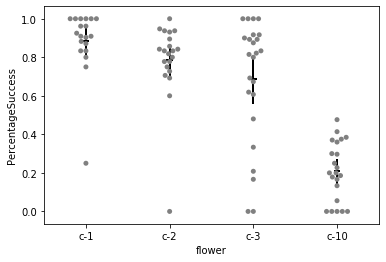

In [62]:
colorScheme = ['#e5e534', '#a1dab4', '#41b6c4', '#225ea8']
colorScheme = ['gray']*4


sns.swarmplot(x = "flower", y = "PercentageSuccess", data = new, palette = colorScheme)
sns.pointplot(x = "flower", y = "PercentageSuccess", data = new, 
              color = 'k', errwidth = 2, linestyles = '', markers = '_')
plt.savefig('./dataFolders/Output/Figures/v2/testColorScheme/' + 'PercentageSuccesful.pdf')

In [10]:
import scipy.stats as stats
# import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [44]:
new['PercentageSuccess']

0     0.909091
1     0.842105
2     1.000000
3     0.000000
4     1.000000
        ...   
95         NaN
96         NaN
97         NaN
98         NaN
99         NaN
Name: PercentageSuccess, Length: 100, dtype: float64

In [49]:
c1 = new.loc[new.flower == 'c-1', 'PercentageSuccess'].values
c1= c1[~np.isnan(c1)]
c2 = new.loc[new.flower == 'c-2', 'PercentageSuccess'].values
c2 = c2[~np.isnan(c2)]
c3 = new.loc[new.flower == 'c-3', 'PercentageSuccess'].values
c3 = c3[~np.isnan(c3)]
c10 = new.loc[new.flower == 'c-10', 'PercentageSuccess'].values
c10 = c10[~np.isnan(c10)]

stats.kruskal(list(c1), list(c2), list(c3), list(c10))

KruskalResult(statistic=41.89851411238542, pvalue=4.216092185307494e-09)

In [57]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

new = new.dropna()
mc = MultiComparison(new['PercentageSuccess'], new['flower'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   c-1   c-10  -0.6757  0.001 -0.8619 -0.4896   True
   c-1    c-2  -0.0977 0.5241 -0.2859  0.0905  False
   c-1    c-3  -0.1985 0.0276  -0.381  -0.016   True
  c-10    c-2    0.578  0.001  0.3967  0.7594   True
  c-10    c-3   0.4772  0.001  0.3018  0.6527   True
   c-2    c-3  -0.1008 0.4503 -0.2784  0.0768  False
----------------------------------------------------
['c-1' 'c-10' 'c-2' 'c-3']


In [58]:
new.dtypes

flower                object
mothnumber            object
PercentageSuccess    float64
dtype: object

# Measure total visits

In [29]:
moth.head()

,Unnamed: 0,MothIn,MothOut,ProboscisDetect,DiscoveryTime,trialNum,name
401,401,14133,15399,NaN,NaN,0,c-3_m9
402,402,19255,21099,20324.0,1069.0,1,c-3_m9
403,403,23301,27204,24498.0,1197.0,2,c-3_m9
404,404,29093,32412,30017.0,924.0,3,c-3_m9
405,405,35787,39527,36042.0,255.0,4,c-3_m9


In [35]:
visit_df = pd.DataFrame(index = np.arange(0,25), columns = ['c-1', 'c-2', 'c-3', 'c-10'])
for file in files:
    df = pd.read_csv(file)
    flowername = os.path.basename(file)[:-14]
    temp = []
    for name,moth in df.groupby('name'):
        totalVisit = np.max(moth.trialNum)+1
        temp.append(totalVisit)
    new_df = pd.Series([temp])    
    visit_df.loc[0:len(temp)-1,flowername] = temp

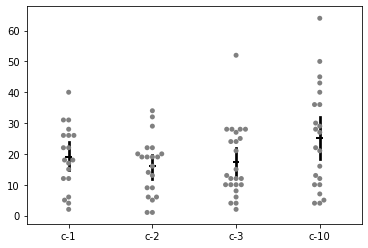

In [63]:
sns.swarmplot(data = visit_df, palette= colorScheme)
sns.pointplot(data = visit_df, markers = '_', linestyles='', color = 'k')
plt.savefig('./dataFolders/Output/Figures/v2/testColorScheme/' + 'TotalNumVisits.pdf')

In [59]:
print(visit_df.count())
visit_df[visit_df>5].count()

c-1     19
c-2     21
c-3     24
c-10    22
dtype: int64


c-1     16
c-2     18
c-3     21
c-10    19
dtype: int64